In [1]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DOWNLOAD_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_tgz(download_path=DOWNLOAD_PATH, housing_url=HOUSING_URL):
    os.makedirs(download_path, exist_ok=True)
    tgz_path = os.path.join(download_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=download_path)
    housing_tgz.close()

In [2]:
fetch_housing_tgz(download_path=DOWNLOAD_PATH, housing_url=HOUSING_URL)

In [3]:
import pandas as pd
def load_data_csv(data=DOWNLOAD_PATH):
    data_path = os.path.join(data, 'housing.csv')
    csv_file = pd.read_csv(data_path)
    return csv_file

In [4]:
data = load_data_csv()

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


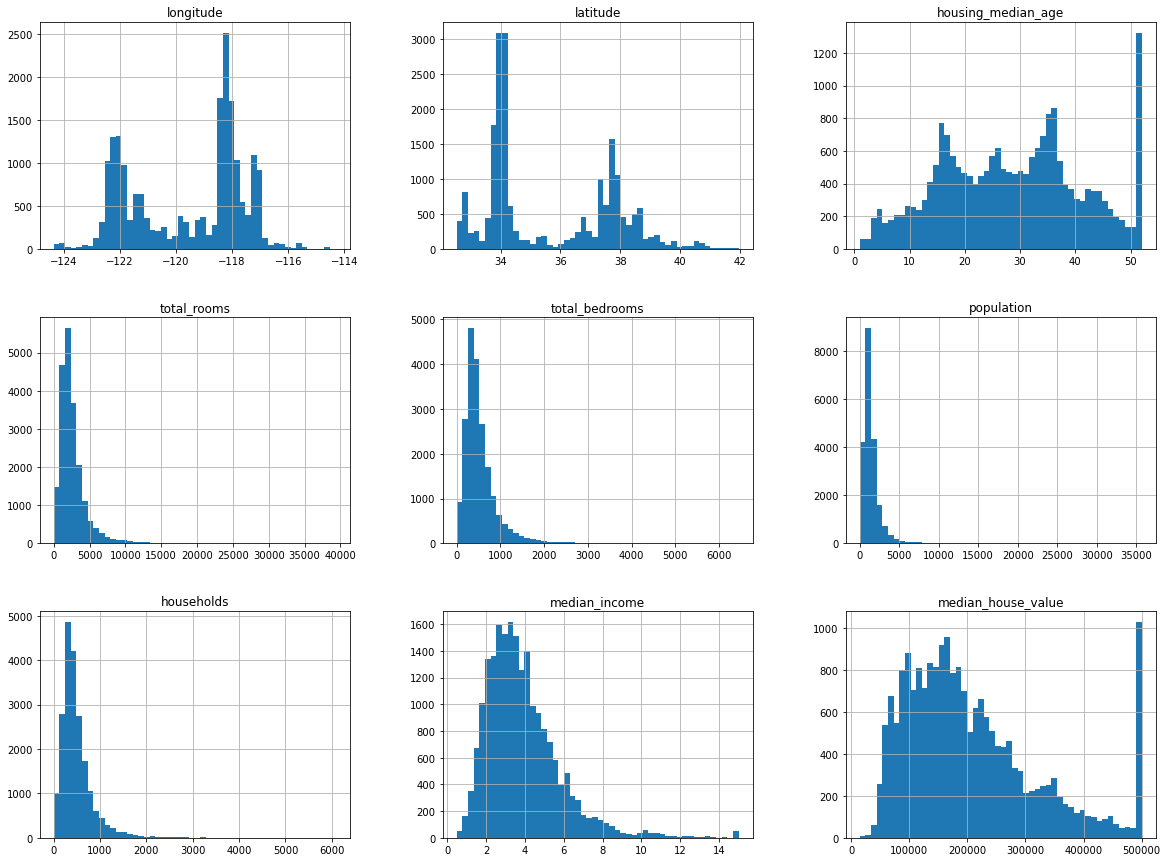

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
import numpy as np 
def split_train_test(data=data, test_ratio=0.2):
    shuffled_indices = np.random.permutation(len(data))
    print("Indices {}".format(shuffled_indices))
    test_set_size = int(len(data) * 0.2)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(data=data)

Indices [  376  1918  5703 ... 11489 14422  6979]


In [10]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2816,-119.02,35.41,21.0,2534.0,554.0,1297.0,517.0,2.0575,67000.0,INLAND
2077,-119.81,36.76,48.0,2059.0,388.0,834.0,405.0,2.9306,67900.0,INLAND
7824,-118.13,33.91,36.0,1967.0,316.0,910.0,306.0,4.4948,190600.0,<1H OCEAN
2649,-124.10,40.50,42.0,2380.0,553.0,1300.0,504.0,1.7574,57500.0,<1H OCEAN
8823,-118.36,34.09,34.0,2832.0,883.0,1594.0,843.0,1.7558,312500.0,<1H OCEAN


In [11]:
from zlib import crc32
def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2 ** 32

In [12]:
def split_train_test_by_id(data, id_column,  test_ratio=0.2):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, id_column="index")

In [14]:
housing_with_id["index"] = data['longitude'] * 1000 + data['latitude']

In [15]:
housing_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121050.52,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121170.51,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121180.57,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121280.57,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
housing = data

In [17]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 1.5, 3, 4.5, 6., np.inf],
    labels= [1, 2, 3, 4, 5]
)

<AxesSubplot:>

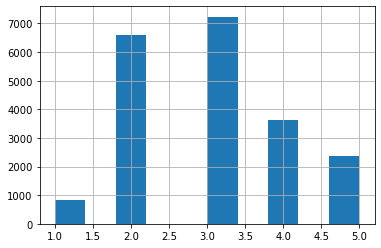

In [18]:
housing["income_cat"].hist()

In [19]:
"""
To get optimized results, we have to make sure that the test set is representative of the whole dataset. 
In order to do that we'll do with the income categories. We need to make sure that the proportion of population from each income categories is same in both training and testing set. For this purpose we'll use StratifiedShuffleSplit. 
"""

from sklearn.model_selection import StratifiedShuffleSplit as sss 

split = sss(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_test_set = housing.loc[test_index]
    strat_train_set = housing.loc[train_index]

In [20]:
strat_test_set["income_cat"].value_counts() / strat_test_set["income_cat"].count()

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set["income_cat"])

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [22]:
housing["income_cat"].value_counts() / len(housing["income_cat"])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
# Test set generation is a very essential part of Machine Learning, Mostly it's neglected. We'll drop the income_cat now
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [24]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [25]:
housing["ocean_proximity"].value_counts() / len(housing["ocean_proximity"])

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [26]:
strat_train_set["ocean_proximity"].value_counts() / len(strat_train_set["ocean_proximity"])

<1H OCEAN     0.440649
INLAND        0.318738
NEAR OCEAN    0.128634
NEAR BAY      0.111858
ISLAND        0.000121
Name: ocean_proximity, dtype: float64

In [27]:
strat_test_set["ocean_proximity"].value_counts() / len(strat_test_set["ocean_proximity"])

<1H OCEAN     0.450581
INLAND        0.312016
NEAR OCEAN    0.129360
NEAR BAY      0.107316
ISLAND        0.000727
Name: ocean_proximity, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

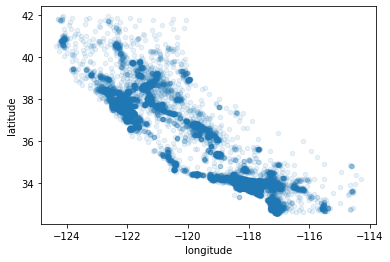

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

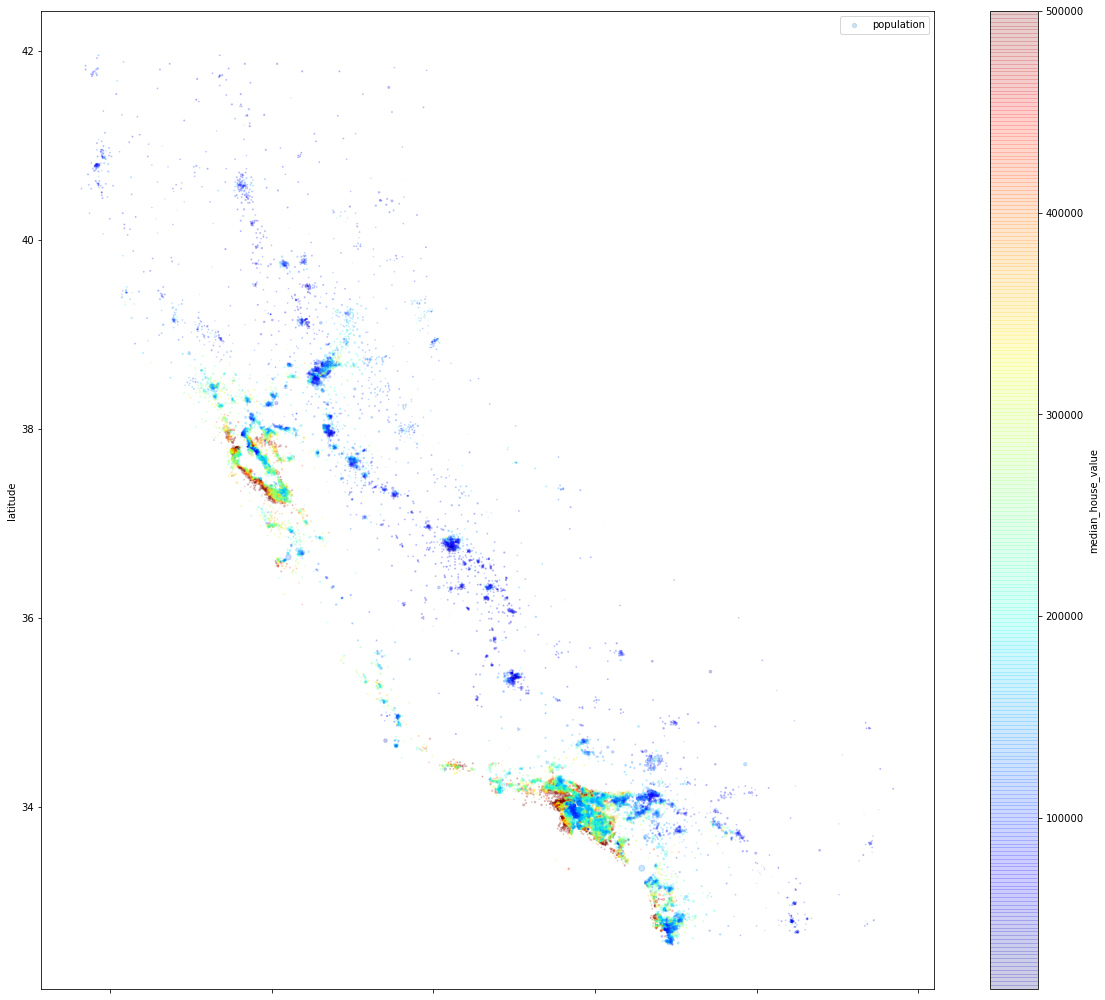

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, s=housing["population"] / 1000, label="population", figsize=(20, 18), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [30]:
# Let's see the correlation between different data types and our target label "median_house_value"
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [31]:
# To find relations between different numerical attributes. We'll use pandas scatter_matrix. 
from pandas.plotting import scatter_matrix
attributes= ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

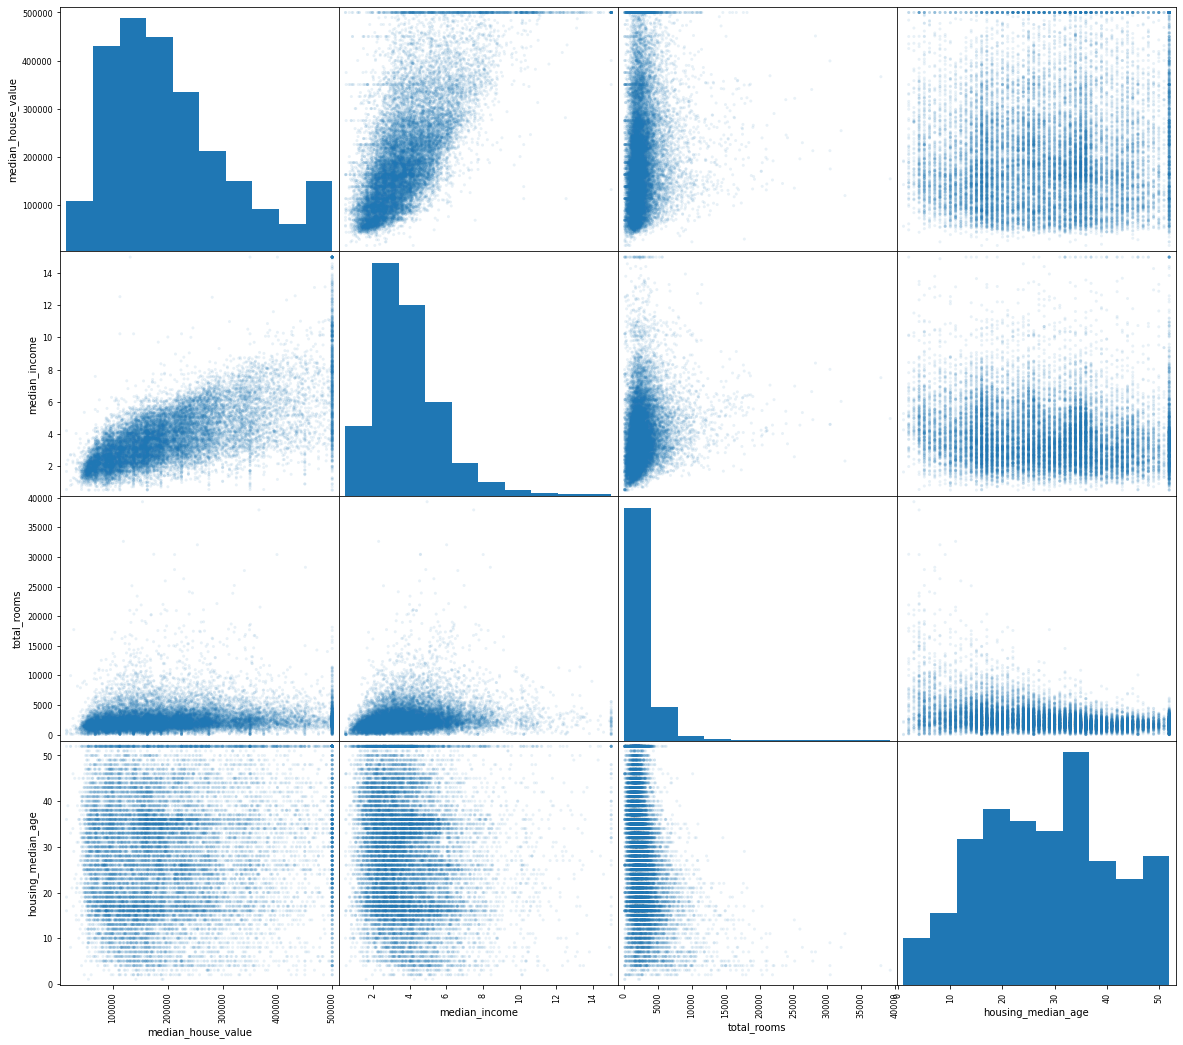

In [32]:
scatter_matrix(housing[attributes], figsize=(20, 18), alpha=0.1)

In [33]:
housing.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
income_cat            20640
dtype: int64

<AxesSubplot:xlabel='[median_income]', ylabel='[median_house_value]'>

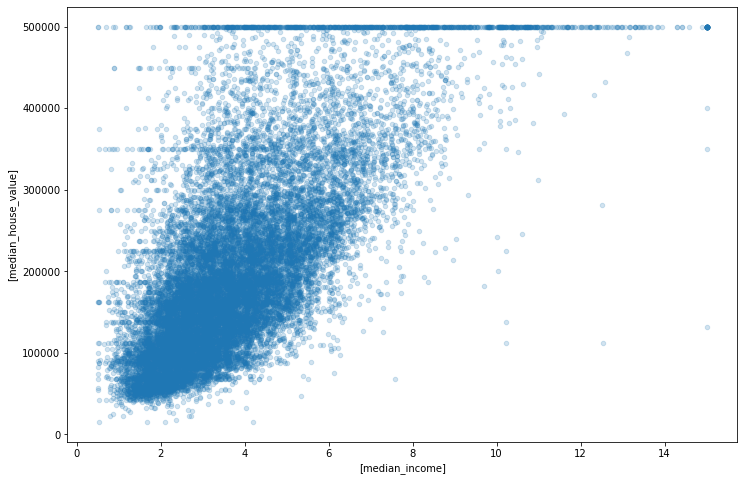

In [34]:
housing.plot(x=["median_income"], y=["median_house_value"], kind="scatter", alpha=0.2, figsize=(12,8))

In [35]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

In [36]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091


In [37]:

def correlation(target_value="median_house_value", C=housing.corr()):
    return C[target_value].sort_values(ascending=False)

In [38]:
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

In [39]:
correlation()

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
Name: median_house_value, dtype: float64

In [40]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096


In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096


In [42]:
correlation()

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
Name: median_house_value, dtype: float64

In [43]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [44]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy="median")

In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)
impute.fit(housing_num)

SimpleImputer(strategy='median')

In [46]:
X = impute.transform(housing_num)

In [47]:
impute.strategy

'median'

In [48]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [49]:
type(housing_num.columns)

pandas.core.indexes.base.Index

In [50]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [51]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [52]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [53]:
type(X)

numpy.ndarray

In [54]:
housing_cat = housing[["ocean_proximity"]]

In [55]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_housing_cat = ordinal_encoder.fit_transform(housing_cat)
encoded_housing_cat[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [56]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
encoded_housing_cat = cat_encoder.fit_transform(housing_cat)

In [57]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms=False):
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        pop_per_household = X[:,population_ix] / X[:,households_ix]
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, pop_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, pop_per_household]

In [59]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_rooms=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_rooms=True)),
    ('std_scaler', StandardScaler()),
])

In [61]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [63]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [64]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [65]:
housing_prepared = full_pipeline.fit_transform(housing)

In [66]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [67]:
housing_prepared.shape

(16512, 16)

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression()

In [69]:
some_data = housing.iloc[:5]

In [70]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [71]:
from sklearn.metrics import mean_squared_error
housing_predictions = lr.predict(housing_prepared)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse

68628.19819848923

In [72]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [73]:
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65187.63274714529 {'max_features': 2, 'n_estimators': 3}
55561.224355741106 {'max_features': 2, 'n_estimators': 10}
52972.24410851822 {'max_features': 2, 'n_estimators': 30}
60960.97906221546 {'max_features': 4, 'n_estimators': 3}
53031.09710925031 {'max_features': 4, 'n_estimators': 10}
50407.00698835109 {'max_features': 4, 'n_estimators': 30}
59113.63164785268 {'max_features': 6, 'n_estimators': 3}
52587.642160255615 {'max_features': 6, 'n_estimators': 10}
50106.85677244059 {'max_features': 6, 'n_estimators': 30}
59026.81088186422 {'max_features': 8, 'n_estimators': 3}
51835.25564720145 {'max_features': 8, 'n_estimators': 10}
50028.281216075964 {'max_features': 8, 'n_estimators': 30}
61325.93753203403 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54220.185446382835 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61365.40906924783 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52594.89357179888 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.62521628e-02, 5.99383380e-02, 4.29609726e-02, 1.51034254e-02,
       1.49660200e-02, 1.55315962e-02, 1.48529197e-02, 3.86525610e-01,
       5.05725345e-02, 1.13301014e-01, 5.83169458e-02, 8.99707653e-03,
       1.47934418e-01, 1.13667049e-04, 1.81971760e-03, 2.81358156e-03])

In [78]:
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.38652560986650997, 'median_income'),
 (0.14793441823631806, 'INLAND'),
 (0.11330101415807768, 'population_per_household'),
 (0.06625216278405466, 'longitude'),
 (0.05993833796686058, 'latitude'),
 (0.05831694583575732, 'bedrooms_per_room'),
 (0.05057253454893517, 'rooms_per_household'),
 (0.04296097258083771, 'housing_median_age'),
 (0.015531596156191974, 'population'),
 (0.015103425434755796, 'total_rooms'),
 (0.014966020022894374, 'total_bedrooms'),
 (0.014852919663314913, 'households'),
 (0.008997076530240362, '<1H OCEAN'),
 (0.002813581563401944, 'NEAR OCEAN'),
 (0.001819717603279754, 'NEAR BAY'),
 (0.00011366704856968954, 'ISLAND')]

In [79]:
cat_encoder

OneHotEncoder()

In [80]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [81]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"]

test_prepared = full_pipeline.transform(x_test)

In [82]:
test_predictions = final_model.predict(test_prepared)

In [83]:
final_mse = mean_squared_error(y_test, test_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48319.168006185035

fuck you motherfucker
